In [1]:
import numpy as np
import pandas as pd
yelp_reviews = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }
with open("yelp_academic_dataset_review.json", "r", encoding='utf8') as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id'])\
                             .query("`date` >= '2022-01-01'")
        yelp_reviews.append(reduced_chunk)
    
yelp_reviews = pd.concat(yelp_reviews, ignore_index=True)
yelp_reviews.describe #80k rows for 12/1/21; 31665  for 2022-01-01

<bound method NDFrame.describe of                   business_id  stars  useful  funny  cool  \
0      drTZrkbpSoJgwKETlFbc3w    1.0       0      0     0   
1      jyxHti29yWdYR00Itt1A2w    5.0       0      0     0   
2      Jo4ei-c-5H53IxZxAVf1jQ    5.0       0      0     0   
3      YT5CjacTllBtvMaMJS3IbA    1.0       0      0     0   
4      9MHe5jAym2d8VhT_NbCRyw    2.0       0      0     0   
...                       ...    ...     ...    ...   ...   
31660  uMVOtr16r1ELu46pWr4HCQ    1.0       0      0     0   
31661  58MJvmfo5hyfBbvkr54sFA    5.0       1      0     0   
31662  e_E-jq9mwm7wk75k7Yi-Xw    5.0       1      0     1   
31663  6WaI-IN8ql0xpEKlb4q8tg    5.0       1      0     0   
31664  Rr9kKArrMhSLVE9a53q-aA    5.0       1      0     0   

                                                    text                date  
0      I bought a Fender 1966 Telecaster that the sal... 2022-01-01 15:47:07  
1      This is our go to for take out when I visit my... 2022-01-02 03:49:0

In [17]:
yelp_reviews.describe

<bound method NDFrame.describe of                   business_id  stars  useful  funny  cool  \
0      drTZrkbpSoJgwKETlFbc3w    1.0       0      0     0   
1      jyxHti29yWdYR00Itt1A2w    5.0       0      0     0   
2      Jo4ei-c-5H53IxZxAVf1jQ    5.0       0      0     0   
3      YT5CjacTllBtvMaMJS3IbA    1.0       0      0     0   
4      9MHe5jAym2d8VhT_NbCRyw    2.0       0      0     0   
...                       ...    ...     ...    ...   ...   
31660  uMVOtr16r1ELu46pWr4HCQ    1.0       0      0     0   
31661  58MJvmfo5hyfBbvkr54sFA    5.0       1      0     0   
31662  e_E-jq9mwm7wk75k7Yi-Xw    5.0       1      0     1   
31663  6WaI-IN8ql0xpEKlb4q8tg    5.0       1      0     0   
31664  Rr9kKArrMhSLVE9a53q-aA    5.0       1      0     0   

                                                    text                date  
0      I bought a Fender 1966 Telecaster that the sal... 2022-01-01 15:47:07  
1      This is our go to for take out when I visit my... 2022-01-02 03:49:0

In [2]:
import numpy as np
import pandas as pd
yelp_busn = []
r_dtypes = {"stars": np.float16, 
            "latitude": np.int32, 
            "longitude": np.int32,
           }
with open("yelp_academic_dataset_business.json", "r", encoding='utf8') as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['is_open', 'longitude','latitude','hours'])\
                             .query("`city` >= 'philadelphia'")
        yelp_busn.append(reduced_chunk)
    
yelp_busn = pd.concat(yelp_busn, ignore_index=True)
yelp_busn.describe

<bound method NDFrame.describe of                business_id                                         name  \
0   Yoy4h6G8S2F0_3-WvS8y1A                               Arrow Electric   
1   zgiGbGRLyj5QpoqsmDZzIg                        Berwyn shower & Glass   
2   1JQT4aQUBo-syiuAFdNhig                     Hammers Moving & Storage   
3   TfCsha7GyoEcadVcvHvG-A                  Greater Nevada Tree Service   
4   TUU1mt51yasYH0QYwzKTEg                 Pachamama Rotisserie Chicken   
5   nV1JfHM2QQphifQzSSAaJQ                        Ashe Couture Boutique   
6   r54l8oG6Ev_qAcmGkSOtdw        Fair Tech Mobile Car And Truck Repair   
7   S97GncBn61zqD-NqCH1SxQ                                   Escape FLA   
8   CtAyhedFk-2rBcbTPJVJyQ                          Vibrance Automotive   
9   gFZCKS41Tb9pXxsmfVDj1Q                                  Aloha Shack   
10  SP_sAkQgnUo5ftf-T4kxqA                                   Bar Napoli   
11  dh5f-63H_B1frtfjnuzooA                                 El Sagu

In [3]:
#make sure all reviews are in english
import langdetect #install via cmd line" !pip install langdetect
from langdetect import detect_langs
language = [detect_langs(i) for i in yelp_reviews.text]
languages = [str(i[0]).split(':')[0] for i in language]
yelp_reviews['language'] = languages

KeyboardInterrupt: 

In [4]:
#first method: dictionaru/lexicon
#add stop words
yelp_reviews.describe
yelp_reviews['text length'] = yelp_reviews['text'].apply(len)
yelp_reviews.head()

,business_id,stars,useful,funny,cool,text,date,text length
0,drTZrkbpSoJgwKETlFbc3w,1.0,0,0,0,I bought a Fender 1966 Telecaster that the sal...,2022-01-01 15:47:07,641
1,jyxHti29yWdYR00Itt1A2w,5.0,0,0,0,This is our go to for take out when I visit my...,2022-01-02 03:49:01,208
2,Jo4ei-c-5H53IxZxAVf1jQ,5.0,0,0,0,Danielle did a great job! She listened and cu...,2022-01-03 03:17:03,278
3,YT5CjacTllBtvMaMJS3IbA,1.0,0,0,0,We saw a lot of roaches in the bathroom when w...,2022-01-05 15:55:59,514
4,9MHe5jAym2d8VhT_NbCRyw,2.0,0,0,0,We Ordered pork fried rice and beef chow mei ...,2022-01-06 03:59:21,148


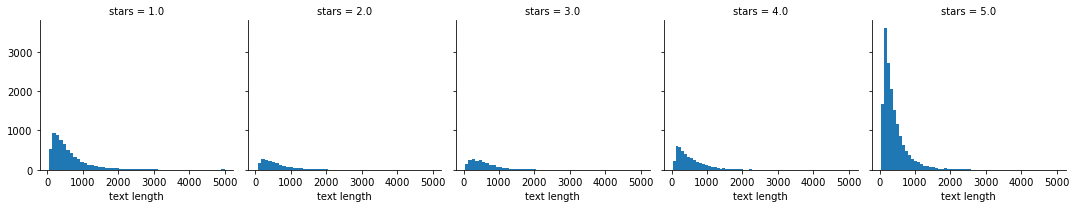

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.FacetGrid(data=yelp_reviews, col='stars')
g.map(plt.hist, 'text length', bins=50)

In [6]:
# Text Pre-Processing
#Issue: All text is plain-text, needs to be a feature vector for classification
#Approach: BOW (bag of words), remove stop words
#function to remove stop words, punctuation, etc
#my code was not working, googled and found an mltk option

#import nltk
#nltk.download('stopwords')
import string
from nltk.corpus import stopwords
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [7]:
#another option is to use the tokening & text processing option from nltk
# removes stop, punctuation and turns the string of text into a vector
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize("The quick brown fox ate suzy''s lunches. Oh no!")
# still has stop words

['The', 'quick', 'brown', 'fox', 'ate', 'suzy', 's', 'lunches', 'Oh', 'no']

In [41]:
#tokenize and store reviews; no ned to maintain unique id
X = yelp_reviews['text']
y = yelp_reviews['stars']
#X[0]
#tokenizer.tokenize(X[0]) # did not remove stop words

X0 = process_text(X[0]) # removes stop words! USE THIS FUNCTION
X0

['bought',
 'fender',
 '1966',
 'telecaster',
 'salesperson',
 'told',
 'original',
 'got',
 'home',
 'noticed',
 '3way',
 'switch',
 'guitar',
 'case',
 'pocket',
 'called',
 'salesperson',
 'told',
 'new',
 'switch',
 'installed',
 'means',
 'instrument',
 'original',
 'asked',
 'salesperson',
 'talk',
 'owner',
 'got',
 'response',
 'wrote',
 'letter',
 'owner',
 'expressing',
 'concern',
 'misrepresentation',
 'asked',
 'discuss',
 'one',
 'ever',
 'responded',
 'disappointing',
 'surprising',
 'would',
 'expect',
 'store',
 'like',
 'rumble',
 'seat',
 'accurate',
 'selling',
 'responsive',
 'customers',
 'concerns']

In [50]:
#stem words - greater = greater = greatest
#assumes that stnregth of word does not correspond strongly to 4/5 rating
import nltk
#nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
snowBallStemmer = SnowballStemmer("english")
stemWords = [snowBallStemmer.stem(word) for word in X0]
print(stemWords)
#stemmed = ' '.join(stemWords)
#print(sentence)
#print('')
#print(stemmed)
#X0_stemmed = stemmed
#vectorizer.fit(X0_stemmed)

['bought', 'fender', '1966', 'telecast', 'salesperson', 'told', 'origin', 'got', 'home', 'notic', '3way', 'switch', 'guitar', 'case', 'pocket', 'call', 'salesperson', 'told', 'new', 'switch', 'instal', 'mean', 'instrument', 'origin', 'ask', 'salesperson', 'talk', 'owner', 'got', 'respons', 'wrote', 'letter', 'owner', 'express', 'concern', 'misrepresent', 'ask', 'discuss', 'one', 'ever', 'respond', 'disappoint', 'surpris', 'would', 'expect', 'store', 'like', 'rumbl', 'seat', 'accur', 'sell', 'respons', 'custom', 'concern']


In [57]:
# At this point, you have the data imported and a way to clean it. now clean all of it and store as vector
# From geeksforgeeks: CountVectorizer is a great tool provided by the scikit-learn library in Python.
# It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X0_vectorizer = vectorizer.fit(stemWords)
print("Vocab: ", X0_vectorizer.vocabulary_)

Vocab:  {'bought': 4, 'fender': 14, '1966': 0, 'telecast': 40, 'salesperson': 33, 'told': 41, 'origin': 27, 'got': 15, 'home': 17, 'notic': 25, '3way': 1, 'switch': 38, 'guitar': 16, 'case': 6, 'pocket': 29, 'call': 5, 'new': 24, 'instal': 18, 'mean': 22, 'instrument': 19, 'ask': 3, 'talk': 39, 'owner': 28, 'respons': 31, 'wrote': 43, 'letter': 20, 'express': 13, 'concern': 7, 'misrepresent': 23, 'discuss': 10, 'one': 26, 'ever': 11, 'respond': 30, 'disappoint': 9, 'surpris': 37, 'would': 42, 'expect': 12, 'store': 36, 'like': 21, 'rumbl': 32, 'seat': 34, 'accur': 2, 'sell': 35, 'custom': 8}


In [33]:

from sklearn.feature_extraction.text import CountVectorizer
  
document = ["One Geek helps Two Geeks",
            "Two Geeks help Four Geeks",
            "Each Geek helps many other Geeks at GeeksforGeeks"]
  
# Create a Vectorizer Object
vectorizer = CountVectorizer()
  
vectorizer.fit(document)
  
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
vector = vectorizer.transform(document)
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Vocabulary:  {'one': 9, 'geek': 3, 'helps': 7, 'two': 11, 'geeks': 4, 'help': 6, 'four': 2, 'each': 1, 'many': 8, 'other': 10, 'at': 0, 'geeksforgeeks': 5}
Encoded Document is:
[[0 0 0 1 1 0 0 1 0 1 0 1]
 [0 0 1 0 2 0 1 0 0 0 0 1]
 [1 1 0 1 1 1 0 1 1 0 1 0]]


In [49]:
# Approach #2 - Naive Bayes using Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#le = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nb = MultinomialNB()
nb.fit(X_train, y_train)


ValueError: could not convert string to float: 'Classic burger was fantastic! The shareable sweet potato fries are really shareable portions. Atmosphere was chill. Would visit again!'

In [50]:
X.head

<bound method NDFrame.head of 0        I bought a Fender 1966 Telecaster that the sal...
1        This is our go to for take out when I visit my...
2        Danielle did a great job!  She listened and cu...
3        We saw a lot of roaches in the bathroom when w...
4        We  Ordered pork fried rice and beef chow mei ...
                               ...                        
31660    Just average Thai food tonight. Bangkok has al...
31661    Great gym.  Was in Indy for 4 days on business...
31662    It is very rare for a restaurant to be this go...
31663    We redesigned my moms dress and mad it complet...
31664    For when I'm feeling like ignoring my calorie-...
Name: text, Length: 31665, dtype: object>

Notes/Thoughts
review length in words vs rating
how many reviews
when are reviews
